In [1]:
import pandas as pd
import numpy as np
train_data=pd.read_csv('train.csv',sep=',',decimal='.')
x_train=pd.read_csv('test.csv',sep=',',decimal='.')
y_test=pd.read_csv('gender_submission.csv',sep=',',decimal='.')
test_data=pd.merge(x_train,y_test,on='PassengerId')
test_data.info()

C:\Users\JULIAN\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [2]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [16]:
print(train_data.info())
print('-')
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
-
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   P

In [4]:
train_data=train_data.drop(labels=['PassengerId','Name','Ticket','Cabin'],axis=1)
train_data['Pclass']=train_data['Pclass'].astype(str)

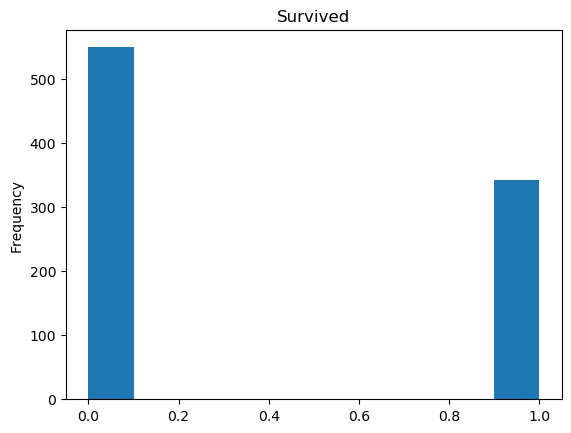

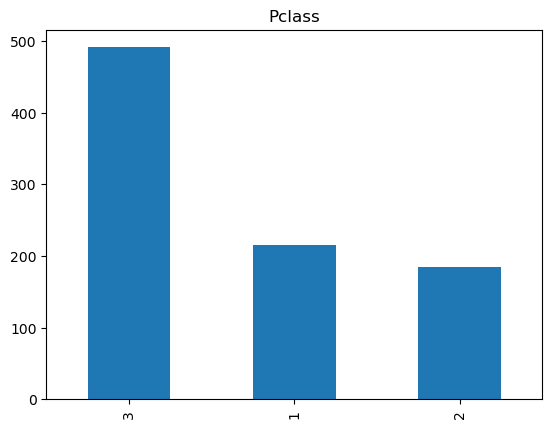

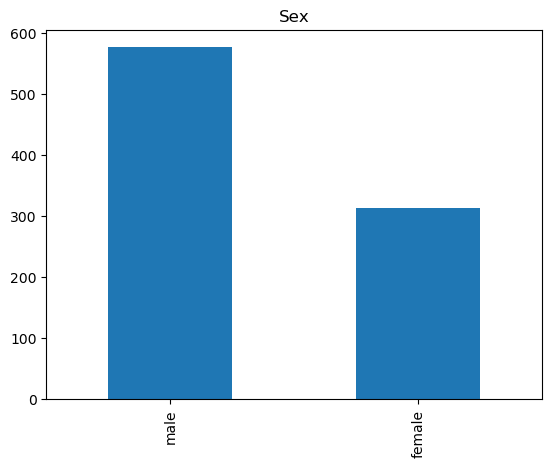

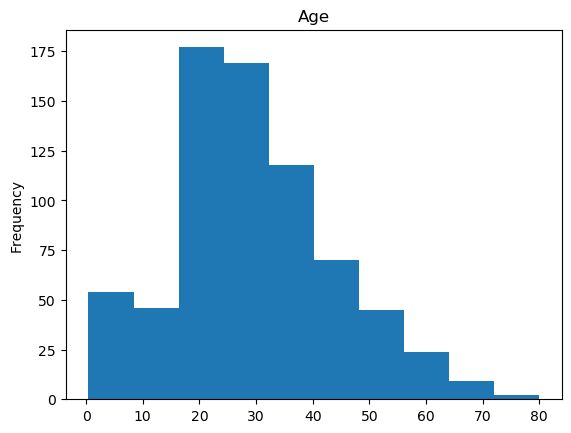

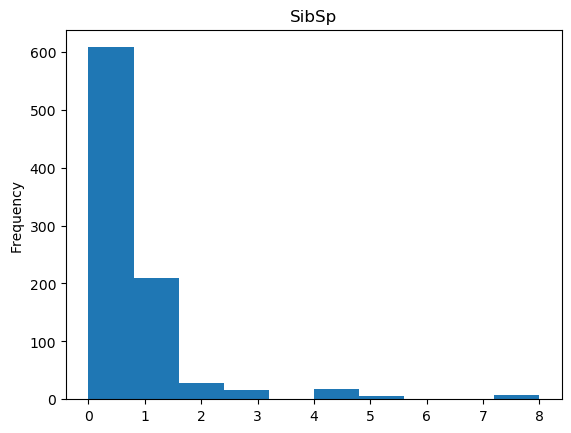

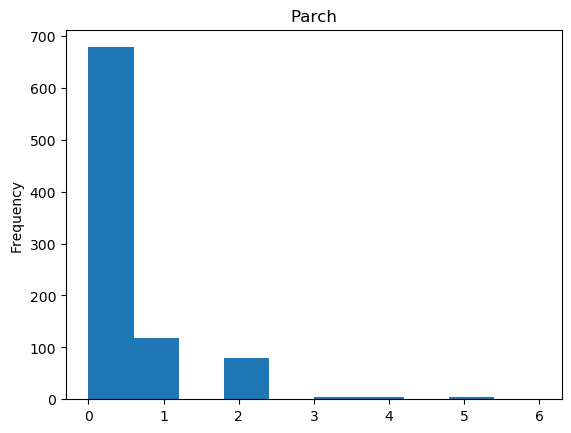

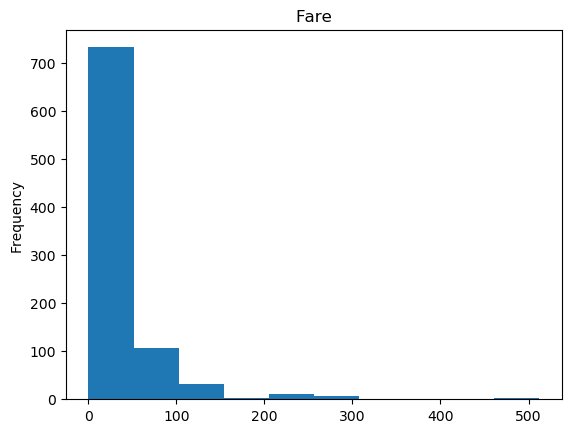

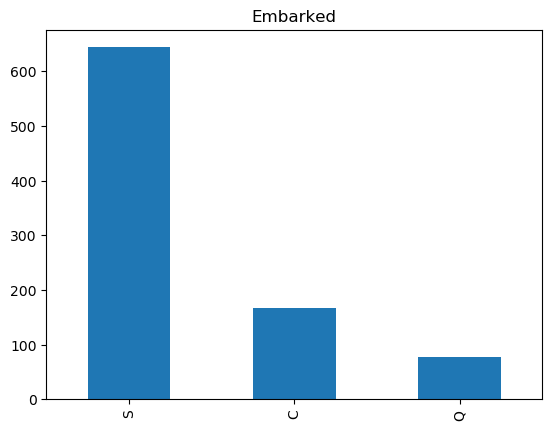

In [21]:
import matplotlib.pyplot as plt
for feat in train_data.columns:
    if train_data[feat].dtype=='object':#para cada iteracion de las columnas hace una gráfica
        train_data[feat].value_counts().plot(kind='bar',title=feat)#si variable es tipo categorica hace un grafico de barras
    else:#si variable es tipo continua hace un grafico de distribución
        train_data[feat].plot(kind='hist',title=feat)
    plt.show()

In [22]:
for var in train_data.columns:
    if train_data[var].dtype=='object':
        k=train_data[[var, 'Survived']].groupby([var],
                                              as_index=False).mean().sort_values(by='Survived', ascending=False)
        print(f'{k},\n')

  Pclass  Survived
0      1  0.629630
1      2  0.472826
2      3  0.242363,

      Sex  Survived
0  female  0.742038
1    male  0.188908,

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957,



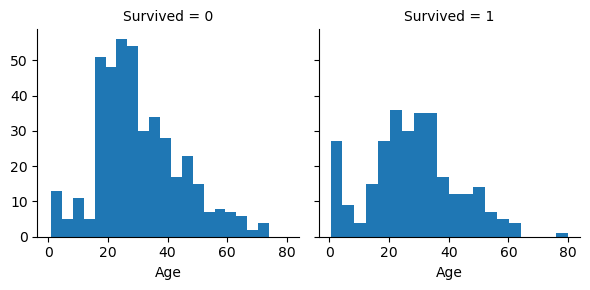

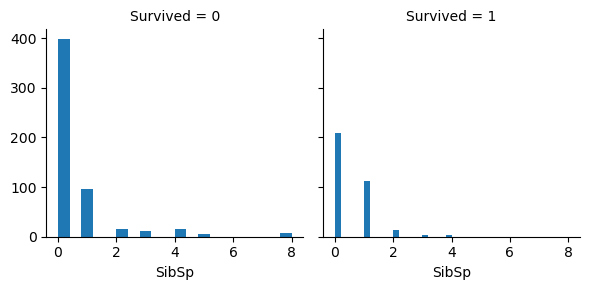

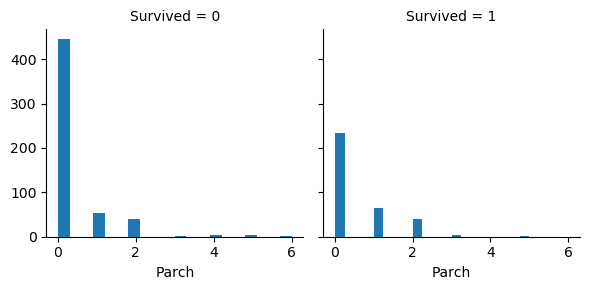

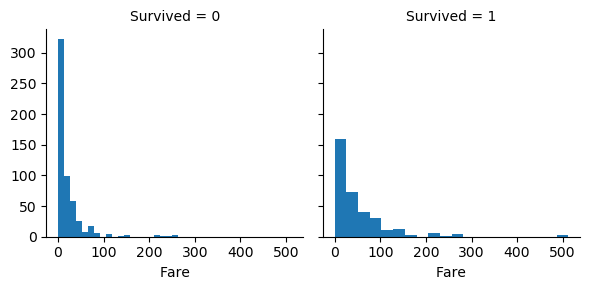

In [23]:
import seaborn as sns
for var in train_data.columns:
    if var=='Survived':
        print('')
    elif train_data[var].dtype=='int64' or train_data[var].dtype=='float64':
        g = sns.FacetGrid(train_data, col='Survived')
        g.map(plt.hist, var, bins=20)
        plt.show()

In [16]:
train_data.groupby(['Survived'])['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

In [21]:
datosfalt=train_data.isnull().sum()
datosfalt

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

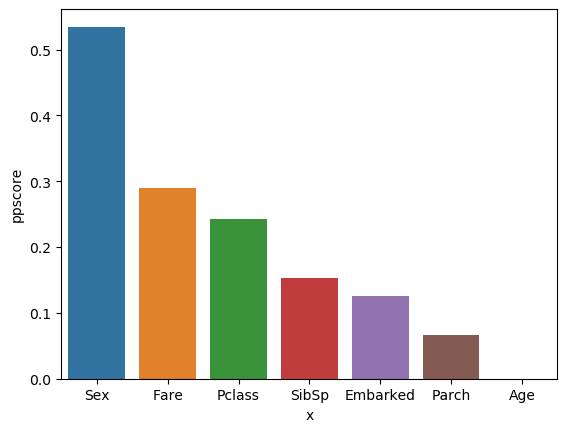

In [31]:
train_data['Survived']=train_data['Survived'].astype(str)
import ppscore as pps
pps_=pps.matrix(train_data)
ppspredictors=pps.predictors(train_data, 'Survived')
sns.barplot(data=ppspredictors,x='x',y='ppscore')
plt.show()

In [22]:
train_data=train_data.fillna(train_data.mean())
train_data['Embarked'] = train_data['Embarked'].fillna('S')

C:\Users\JULIAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [23]:
datosfalt=train_data.isnull().sum()
datosfalt

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [29]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    object 
 1   Pclass    891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 55.8+ KB


In [24]:
train_data['Survived']=train_data['Survived'].astype(str)
categ_feats = list(train_data.columns.values)
list_to_remove = ['Age','SibSp','Parch','Survived','Fare']
categ_feats = list(set(categ_feats).difference(set(list_to_remove)))
train_data = pd.get_dummies(train_data, columns = categ_feats)
train_data

,Survived,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,22.000000,1,0,7.2500,0,1,0,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,1,0,0,1,0,0
2,1,26.000000,0,0,7.9250,1,0,0,0,1,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,0,1,1,0,0
4,0,35.000000,0,0,8.0500,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,0,1,0,0,1,0,1,0
887,1,19.000000,0,0,30.0000,1,0,0,0,1,1,0,0
888,0,29.699118,1,2,23.4500,1,0,0,0,1,0,0,1
889,1,26.000000,0,0,30.0000,0,1,1,0,0,1,0,0


In [25]:
from sklearn import preprocessing
numeric_feats = ['Age','SibSp','Parch','Fare']
df_numeric_feats = pd.DataFrame(train_data, columns = numeric_feats)
df_categ_feats = train_data.drop(columns = numeric_feats)
min_max_scaler = preprocessing.MinMaxScaler()
normalized_numeric_feats = min_max_scaler.fit_transform(df_numeric_feats)
normalized_numeric_feats = pd.DataFrame(normalized_numeric_feats, columns = numeric_feats, index=df_categ_feats.index)
df_numeric_norm = pd.concat([df_categ_feats, normalized_numeric_feats], axis=1)
df_numeric_norm

,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3,Age,SibSp,Parch,Fare
0,0,0,1,0,0,1,0,0,1,0.271174,0.125,0.000000,0.014151
1,1,1,0,1,0,0,1,0,0,0.472229,0.125,0.000000,0.139136
2,1,1,0,0,0,1,0,0,1,0.321438,0.000,0.000000,0.015469
3,1,1,0,0,0,1,1,0,0,0.434531,0.125,0.000000,0.103644
4,0,0,1,0,0,1,0,0,1,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,1,0,0,1,0,1,0,0.334004,0.000,0.000000,0.025374
887,1,1,0,0,0,1,1,0,0,0.233476,0.000,0.000000,0.058556
888,0,1,0,0,0,1,0,0,1,0.367921,0.125,0.333333,0.045771
889,1,0,1,1,0,0,1,0,0,0.321438,0.000,0.000000,0.058556


In [35]:
X= df_numeric_norm.drop('Survived', axis=1)
Y = df_numeric_norm['Survived']
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy
model = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
feat_selector = BorutaPy(
    verbose=2,
    estimator=model,
    n_estimators='auto',
    max_iter=10  # number of iterations to perform
)
feat_selector.fit(np.array(X), np.array(Y))

# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
p=[]
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        p.append(X.columns[i])
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X.columns[i], " - Ranking: ", feat_selector.ranking_[i])
print(p)

Iteration: 	1 / 10
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	2 / 10
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	3 / 10
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	4 / 10
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	5 / 10
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	6 / 10
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	7 / 10
Confirmed: 	0
Tentative: 	12
Rejected: 	0
Iteration: 	8 / 10
Confirmed: 	5
Tentative: 	1
Rejected: 	6
Iteration: 	9 / 10
Confirmed: 	5
Tentative: 	1
Rejected: 	6


BorutaPy finished running.

Iteration: 	10 / 10
Confirmed: 	5
Tentative: 	0
Rejected: 	6

------Support and Ranking for each feature------
Passes the test:  Sex_female  - Ranking:  1
Passes the test:  Sex_male  - Ranking:  1
Doesn't pass the test:  Embarked_C  - Ranking:  6
Doesn't pass the test:  Embarked_Q  - Ranking:  8
Doesn't pass the test:  Embarked_S  - Ranking:  4
Doesn't pass the test:  Pclass_1  - Ranking:  3
Doesn't pass the test:  Pcla

In [36]:
p.append('Survived')
df_numeric_norm=df_numeric_norm[p]
df_numeric_norm

,Sex_female,Sex_male,Pclass_3,Age,Fare,Survived
0,0,1,1,0.271174,0.014151,0
1,1,0,0,0.472229,0.139136,1
2,1,0,1,0.321438,0.015469,1
3,1,0,0,0.434531,0.103644,1
4,0,1,1,0.434531,0.015713,0
...,...,...,...,...,...,...
886,0,1,0,0.334004,0.025374,0
887,1,0,0,0.233476,0.058556,1
888,1,0,1,0.367921,0.045771,0
889,0,1,0,0.321438,0.058556,1


In [37]:
test_data=pd.merge(x_train,y_test,on='PassengerId')
test_data=test_data.drop(labels=['Name','Ticket','Cabin'],axis=1)
test_data['Pclass']=test_data['Pclass'].astype(str)
test_data=test_data.fillna(train_data.mean())
test_data['Embarked'] = test_data['Embarked'].fillna('S')
categ_featsk = list(test_data.columns.values)
list_to_removek = ['Age','SibSp','Parch','Fare','PassengerId','Survived']
categ_featsk = list(set(categ_featsk).difference(set(list_to_removek)))
test_data = pd.get_dummies(test_data, columns = categ_featsk)
numeric_featsk = ['Age','SibSp','Parch','Fare']
test_data['PassengerId']=test_data['PassengerId'].astype(str)
test_data=test_data.set_index('PassengerId')
df_numeric_featsk = pd.DataFrame(test_data, columns = numeric_featsk)
df_categ_featsk = test_data.drop(columns = numeric_featsk)
min_max_scaler = preprocessing.MinMaxScaler()
normalized_numeric_featsk = min_max_scaler.fit_transform(df_numeric_featsk)
normalized_numeric_featsk = pd.DataFrame(normalized_numeric_featsk, columns = numeric_featsk, index=df_categ_featsk.index)
df_numeric_normk = pd.concat([df_categ_featsk, normalized_numeric_featsk], axis=1)
df_numeric_normk['Survived']=df_numeric_normk['Survived'].astype(str)
df_numeric_normk=df_numeric_normk[p]
df_numeric_normk

,Sex_female,Sex_male,Pclass_3,Age,Fare,Survived
PassengerId,,,,,,
892,0,1,1,0.452723,0.015282,0
893,1,0,1,0.617566,0.013663,1
894,0,1,0,0.815377,0.018909,0
895,0,1,1,0.353818,0.016908,0
896,1,0,1,0.287881,0.023984,1
...,...,...,...,...,...,...
1305,0,1,1,0.389412,0.015713,0
1306,1,0,0,0.512066,0.212559,1
1307,0,1,1,0.505473,0.014151,0


In [38]:
X_train= df_numeric_norm.drop('Survived', axis=1).values
Y_train = df_numeric_norm['Survived'].values
X_test= df_numeric_normk.drop('Survived', axis=1).values
Y_test = df_numeric_normk['Survived'].values

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

79.35

In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print('logrg test set confusion matrix:')

print(pd.DataFrame(confusion_matrix(Y_test, Y_pred)), '\n')
print('logrg test set classification report:')
print(classification_report(Y_test, Y_pred))

logrg test set confusion matrix:
     0    1
0  264    2
1    3  149 

logrg test set classification report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       266
           1       0.99      0.98      0.98       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



In [41]:
coeff_df = pd.DataFrame(df_numeric_norm.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
0,Sex_male,1.246138
4,Survived,1.200827
1,Pclass_3,-1.246132
2,Age,-1.519868
3,Fare,-1.522740


In [42]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_prd_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

79.12

In [43]:
print('svc test set confusion matrix:')

print(pd.DataFrame(confusion_matrix(Y_test, Y_prd_svc)), '\n')
print('svc test set classification report:')
print(classification_report(Y_test, Y_prd_svc))

svc test set confusion matrix:
     0    1
0  266    0
1   41  111 

svc test set classification report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       266
           1       1.00      0.73      0.84       152

    accuracy                           0.90       418
   macro avg       0.93      0.87      0.89       418
weighted avg       0.92      0.90      0.90       418



In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_prd_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

89.0

In [45]:
print('knn test set confusion matrix:')

print(pd.DataFrame(confusion_matrix(Y_test, Y_prd_knn)), '\n')
print('knn test set classification report:')
print(classification_report(Y_test, Y_prd_knn))

knn test set confusion matrix:
     0   1
0  229  37
1   56  96 

knn test set classification report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       266
           1       0.72      0.63      0.67       152

    accuracy                           0.78       418
   macro avg       0.76      0.75      0.75       418
weighted avg       0.77      0.78      0.77       418



In [46]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_prd_gaussian = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

78.11

In [47]:
print('gaussian test set confusion matrix:')

print(pd.DataFrame(confusion_matrix(Y_test, Y_prd_gaussian)), '\n')
print('gasussian test set classification report:')
print(classification_report(Y_test, Y_prd_gaussian))

gaussian test set confusion matrix:
     0    1
0  254   12
1    0  152 

gasussian test set classification report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98       266
           1       0.93      1.00      0.96       152

    accuracy                           0.97       418
   macro avg       0.96      0.98      0.97       418
weighted avg       0.97      0.97      0.97       418



In [48]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_prd_prceptron = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

61.62

In [111]:
print('perceptron test set confusion matrix:')

print(pd.DataFrame(confusion_matrix(Y_test, Y_prd_prceptron)), '\n')
print('perceptron test set classification report:')
print(classification_report(Y_test, Y_prd_prceptron))

perceptron test set confusion matrix:
     0  1
0  266  0
1  152  0 

perceptron test set classification report:
              precision    recall  f1-score   support

           0       0.64      1.00      0.78       266
           1       0.00      0.00      0.00       152

    accuracy                           0.64       418
   macro avg       0.32      0.50      0.39       418
weighted avg       0.40      0.64      0.49       418



C:\Users\JULIAN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JULIAN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\JULIAN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_prd_linear_svc = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.68

In [53]:
print('linear svc test set confusion matrix:')

print(pd.DataFrame(confusion_matrix(Y_test, Y_prd_linear_svc)), '\n')
print('linear svc test set classification report:')
print(classification_report(Y_test, Y_prd_linear_svc))

linear svc test set confusion matrix:
     0    1
0  264    2
1    1  151 

linear svc test set classification report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       266
           1       0.99      0.99      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



In [54]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_prd_sgd = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

79.46

In [55]:
print('sgd test set confusion matrix:')

print(pd.DataFrame(confusion_matrix(Y_test, Y_prd_sgd)), '\n')
print('sgd test set classification report:')
print(classification_report(Y_test, Y_prd_sgd))

sgd test set confusion matrix:
     0   1
0  266   0
1   67  85 

sgd test set classification report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       266
           1       1.00      0.56      0.72       152

    accuracy                           0.84       418
   macro avg       0.90      0.78      0.80       418
weighted avg       0.87      0.84      0.83       418



In [56]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_prd_d = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

97.98

In [57]:
print('decision tree classifier test set confusion matrix:')

print(pd.DataFrame(confusion_matrix(Y_test, Y_prd_d)), '\n')
print('decision tree classifier test set classification report:')
print(classification_report(Y_test, Y_prd_d))

decision tree classifier test set confusion matrix:
     0    1
0  215   51
1   48  104 

decision tree classifier test set classification report:
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       266
           1       0.67      0.68      0.68       152

    accuracy                           0.76       418
   macro avg       0.74      0.75      0.75       418
weighted avg       0.76      0.76      0.76       418



In [118]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_prd_rf = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

97.98

In [119]:
print('random forest test set confusion matrix:')

print(pd.DataFrame(confusion_matrix(Y_test, Y_prd_rf)), '\n')
print('random forest test set classification report:')
print(classification_report(Y_test, Y_prd_rf))

random forest test set confusion matrix:
     0    1
0  229   37
1   49  103 

random forest test set classification report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       266
           1       0.74      0.68      0.71       152

    accuracy                           0.79       418
   macro avg       0.78      0.77      0.77       418
weighted avg       0.79      0.79      0.79       418



In [120]:
k1 = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree','rf'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree,acc_random_forest]})
k1.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,97.98
8,Decision Tree,97.98
9,rf,97.98
1,KNN,89.00
2,Logistic Regression,79.35
0,Support Vector Machines,79.12
6,Stochastic Gradient Decent,78.90
7,Linear SVC,78.68
4,Naive Bayes,78.11
5,Perceptron,61.62


In [149]:
df_numeric_normk['Survived']=sgd.predict(X_test)

In [154]:
submission=df_numeric_normk[['Survived']]
submission.to_csv('submission__3.csv',sep=',')